**Run the following two cells before you begin.**

In [ ]:
%autosave 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

url='https://raw.githubusercontent.com/Technocolabs100/Project-Data-Set-Repository/master/Data%20set/cleaned_data.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [2]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [18]:
from sklearn.model_selection import train_test_split
X=df[features_response[:-1]].values
y=df['default payment next month'].values

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=24)    
    

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [40]:

rf_params_ex = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [21]:
from sklearn.model_selection import GridSearchCV
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [22]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   0.5s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s finished
C:\Users\RADHIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             iid=False, param_grid={'n_estimators': [10]}, pre_dispatch=None,
             return_train_score=True, scoring='roc_auc', verbose=2)

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [23]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.364988,0.05588,0.049537,0.025814,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,1,0.767973,0.767158,0.76055,0.763683,0.764841,0.002955


**Find the best hyperparameters from the cross-validation.**

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False, random_state=1)
results=cross_val_score(cv_rf_ex, X, y, cv=k_folds)
results
print("Accuracy:",results.mean()*100)

C:\Users\RADHIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished
C:\Users\RADHIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.4s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished
C:\Users\RADHIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s finished
C:\Users\RADHIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.3s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished
C:\Users\RADHIKA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Accuracy: 75.70086633495174


________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [32]:
# Create a 5x5 grid
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)
z_example = np.arange(1,17).reshape(4,4)
z_example
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [34]:
# Set color map to `plt.cm.jet`
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)

Text(0, 0.5, 'Y coordinate')

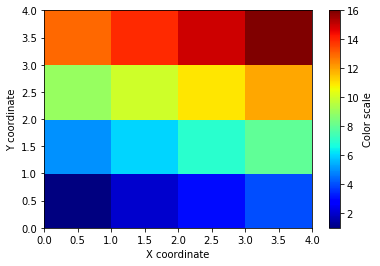

In [35]:
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [38]:
# Create a dataframe of the feature names and importance
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})

In [39]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.727283
11,PAY_AMT1,0.076459
0,LIMIT_BAL,0.035797
13,PAY_AMT3,0.033951
12,PAY_AMT2,0.024062
14,PAY_AMT4,0.019020
16,PAY_AMT6,0.018872
9,BILL_AMT5,0.018568
5,BILL_AMT1,0.011970
8,BILL_AMT4,0.011928
